In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

import xarray as xr
import matplotlib.pyplot as plt
import sys
from scipy.ndimage import uniform_filter1d


In [14]:
dataFile =r'O:\HybridDune experiment\data ADV, OBS\raw NetCDF\ADV S1ADV1 raw data - period 1.nc'
offset = 102718
# ncFilePath1 = r'O:\HybridDune experiment\data RBR, OSSI\copy RBR Udrive series1\raw NetCDF\test 0_fill999.nc'
# #ncFilePath2 = r'O:\HybridDune experiment\data RBR, OSSI\copy RBR Udrive series1\raw NetCDF\test 0_fill0.nc'
# ncFilePath3 = r'O:\HybridDune experiment\data RBR, OSSI\copy RBR Udrive series1\raw NetCDF\test nan_fill999.nc'
# #ncFilePath4 = r'O:\HybridDune experiment\data RBR, OSSI\copy RBR Udrive series1\raw NetCDF\test nan_fill0.nc'

# encoding_fill0 = {'p': { 'scale_factor': 10, 'dtype': 'int16', '_FillValue': 0, "zlib": True, "complevel": 4 },        # 'scale_factor': 0.001, 'dtype': 'int16', '_FillValue': -999, 
#                   't': { "zlib": True, "complevel": 4} }
# encoding_fill999 = {'p': { 'scale_factor': 10, 'dtype': 'int16', '_FillValue': 999, "zlib": True, "complevel": 4 },        # 'scale_factor': 0.001, 'dtype': 'int16', '_FillValue': -999, 
#                   't': { "zlib": True, "complevel": 4} }

# ds =  xr.open_dataset(dataFile)
# ds_out = ds.p.isel(t=slice(0, 10))  # example selection
# ds_out.values[0] = 0
# ds_out.to_netcdf(ncFilePath1, encoding=encoding_fill999)
# #ds_out.to_netcdf(ncFilePath2, encoding=encoding_fill0)

# ds = xr.open_dataset(dataFile)
# ds_out = ds.p.isel(t=slice(0, 10))  # example selection
# ds_out.values[0] = np.nan
# ds_out.to_netcdf(ncFilePath3, encoding=encoding_fill999)
# #ds_out.to_netcdf(ncFilePath4, encoding=encoding_fill0)

ncFilePath1 = r'O:\HybridDune experiment\data ADV, OBS\raw NetCDF\test.nc'
encoding = {'p': { 'scale_factor': 10.0, 'dtype': 'uint16', '_FillValue': 0, 'add_offset': offset, "zlib": True, "complevel": 4 },        # 'scale_factor': 0.001, 'dtype': 'int16', '_FillValue': -999, 
            't': { "zlib": True, "complevel": 4} }

ds = xr.open_dataset(dataFile)
ds_out = ds.isel(t=slice(0, 4), N=slice(0, 5)).p  # example selection
print(ds_out.values)

# replace values 680 in ds_out with nan
ds_out.values[ds_out.values == 680] = np.nan
ds_out.values = ds_out.values + offset  # add offset for calibration
print(ds_out.values)

ds_out.to_netcdf(ncFilePath1, encoding = encoding)

[[680. 910. 450. 680. 680.]
 [570. 680. 910. 570. 680.]
 [570. 800. 800. 680. 680.]
 [450. 800. 680. 450. 570.]]
[[    nan 103628. 103168.     nan     nan]
 [103288.     nan 103628. 103288.     nan]
 [103288. 103518. 103518.     nan     nan]
 [103168. 103518.     nan 103168. 103288.]]


In [2]:
# load netcdf
ncFilePath1 = r'O:\RealDune dataset\20211109_20211215_rbr.nc'
ds = xr.open_dataset(ncFilePath1)
ds
#print(ds)


<xarray.Dataset> Size: 3GB
Dimensions:  (time: 25574400)
Coordinates:
  * time     (time) float64 205MB 1.636e+09 1.636e+09 ... 1.64e+09 1.64e+09
Data variables: (12/13)
    ap       (time) float64 205MB ...
    p_1      (time) float64 205MB ...
    p_2      (time) float64 205MB ...
    p_3      (time) float64 205MB ...
    p_4      (time) float64 205MB ...
    p_5      (time) float64 205MB ...
    ...       ...
    p_apc_1  (time) float64 205MB ...
    p_apc_2  (time) float64 205MB ...
    p_apc_3  (time) float64 205MB ...
    p_apc_4  (time) float64 205MB ...
    p_apc_5  (time) float64 205MB ...
    p_apc_6  (time) float64 205MB ...
Attributes:
    description:  RBR pressure transducer data for 2021-11-09 00:00:00 – 2021...
    history:      Created on [YYYY-mm-dd]: 2024-02-06

In [ ]:
# # Python where
a = np.array([1, 0, 2, 3, 5, 7.])
b = np.where(a>3, a, 0) # keep where true, make 0 where false
b

dataFile =r'O:\HybridDune experiment\data RBR, OSSI\netcdf\QC\Deployment period 1\Pressure sensor refP1 RBR4 p_air - period 1.nc'
ds = xr.open_dataset(dataFile).isel(t=slice(0,10))
p = ds.p_air
p.values = range(10)
p2 = p.where(p>4)       # keep where true, make nan where false
p2 = p.where(p>4, 0)    # keep where true, make 0 where false
p2 = p.where(~(p>4), 0) # switch true and false

p2#.values



<xarray.DataArray 'p_air' (t: 10)> Size: 80B
array([0, 1, 2, 3, 4, 0, 0, 0, 0, 0])
Coordinates:
  * t        (t) datetime64[ns] 80B 2024-12-17T11:00:00 ... 2024-12-17T11:00:...
Attributes:
    units:        Pa
    long_name:    Air pressure
    comments:     10s moving average and calibrated
    calibration:  -543 Pa added to raw pressure, based on the period 23dec, 1...

In [ ]:
# Python lists
fruits = ["apple", "banana", "cherry"]
for i in range(2,3):
    fr = fruits[i]
    print(fr)
#for x in fruits:
#  print(x)

In [ ]:
# # Testing moving average

def moving_average_w_edges(x, N): # Note: still edge effects
    padded = np.pad(x, (N//2, N-1-N//2), mode='symmetric')   # for even window: backward avg. So window 2: x_m(i)=[x(i-1)+x(i)]/2
    padded = np.pad(x, (N//2, N-1-N//2), constant_values=0)   # for even window: backward avg. So window 2: x_m(i)=[x(i-1)+x(i)]/2

    print(padded)
    return np.convolve(padded, np.ones((N,))/N, mode='valid')

rng = np.random.default_rng()
a = rng.integers(9, size=(5))
a = np.array([1, 0, 2, 2, 5.])
#a_2d = rng.integers(6, size=(3,3))
a_float = a.astype(np.float64)

print(a)

y = moving_average_w_edges(a,3) # does not work for edges
# y = moving_average_w_edges(a_2d,2) # works not for 2D

print(y)

# Based on uniform filter. Gives same o utput as moving_avg_with_edges, when using mode=symmetric
y2 = uniform_filter1d(a_float, size=3, mode='constant') # for even window: backward avg. So window 2: x_m(i)=[x(i-1)+x(i)]/2
print(y2) # same output. So same result for edges

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

y3 = running_mean(a,3)
#print(y3)

In [ ]:
t1 = datetime(2023, 10, 13, 13, 0, 0)
t2 = datetime(2023, 10, 14, 13, 10, 0)
t = pd.date_range(t1,t2, freq='{}S'.format(1 / 16) )
print(t)

ds0_cropped = ds0.sel(t=slice(t0, t_end)) # crop dataset to the time range of interest

In [5]:
# Reshape XArray
x = xr.DataArray(np.arange(12).reshape(3, 4), dims=['x', 'y'])
print(x)

# Reshape XArray to 1d vector
x_1d = x.stack(z=('x', 'y'))
print(x_1d)

<xarray.DataArray (x: 3, y: 4)> Size: 96B
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])
Dimensions without coordinates: x, y
<xarray.DataArray (z: 12)> Size: 96B
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Coordinates:
  * z        (z) object 96B MultiIndex
  * x        (z) int64 96B 0 0 0 0 1 1 1 1 2 2 2 2
  * y        (z) int64 96B 0 1 2 3 0 1 2 3 0 1 2 3


In [15]:
# Coordinate transformation
xRD_all   = [np.nan,  72429.072,  72412.478,  72398.360,  72382.977,  72444.875]                          # x position of placement in field
yRD_all   = [np.nan, 452174.014, 452150.390, 452130.334, 452111.119, 452163.053]                          # y position of placement in field
xy_RD = np.array([xRD_all, yRD_all]).T
a = np.deg2rad(36)
transformation_matrix = np.array([ [np.cos(a), np.sin(a)],[-np.sin(a), np.cos(a)] ])
xy_loc = ( xy_RD - [71683.584, 452356.055] ) @ transformation_matrix
x_loc_all = xy_loc.T[0]
y_loc_all = xy_loc.T[1]

print(xy_RD)
print(transformation_matrix)
print(xy_loc)
print(x_loc_all)


[[       nan        nan]
 [ 72429.072 452174.014]
 [ 72412.478 452150.39 ]
 [ 72398.36  452130.334]
 [ 72382.977 452111.119]
 [ 72444.875 452163.053]]
[[ 0.80901699  0.58778525]
 [-0.58778525  0.80901699]]
[[         nan          nan]
 [710.11347622 290.91258949]
 [710.57448701 262.04666354]
 [710.9414061  237.52266651]
 [709.7905913  212.93550442]
 [729.34108593 291.33372455]]
[         nan 710.11347622 710.57448701 710.9414061  709.7905913
 729.34108593]


In [4]:
from get_optimal_shuffle_encoding import get_optimal_shuffle_encoding
folder_in = r'O:\HybridDune experiment\data RBR, OSSI\copy RBR Udrive series2\processed'
filename_in = r'Pressure sensor S3P3 RBR6 processed data - period 2.nc'
encoding_shuffle_optimal = get_optimal_shuffle_encoding(folder_in, filename_in)
print(encoding_shuffle_optimal)

Variable p: shuffle on is smaller: 33075 kB < 139307 kB
Variable h_mean: shuffle on is smaller: 22 kB < 25 kB
Variable zs: shuffle on is smaller: 126009 kB < 132165 kB
Variable zs_IG: shuffle on is smaller: 37985 kB < 102682 kB
Variable zs_WW: shuffle on is smaller: 126156 kB < 132064 kB
Variable h: shuffle on is smaller: 120701 kB < 130388 kB
Variable h_IG: shuffle on is smaller: 34781 kB < 102403 kB
Variable h_WW: shuffle on is smaller: 120894 kB < 130317 kB
Variable psd: shuffle on is smaller: 3658 kB < 4352 kB
Variable psd_IG: shuffle on is smaller: 3557 kB < 4341 kB
Variable psd_WW: shuffle on is smaller: 3615 kB < 4353 kB
Variable Hm0: shuffle on is smaller: 22 kB < 24 kB
Variable Tp: shuffle on is smaller: 15 kB < 16 kB
Variable Tm01: shuffle on is smaller: 22 kB < 24 kB
Variable Tm02: shuffle on is smaller: 22 kB < 24 kB
Variable Tmm10: shuffle on is smaller: 22 kB < 24 kB
Variable Tps: shuffle on is smaller: 22 kB < 24 kB
Variable Hm0_IG: shuffle on is smaller: 22 kB < 24 kB
V

2024-12-22T07:00:00.000000000


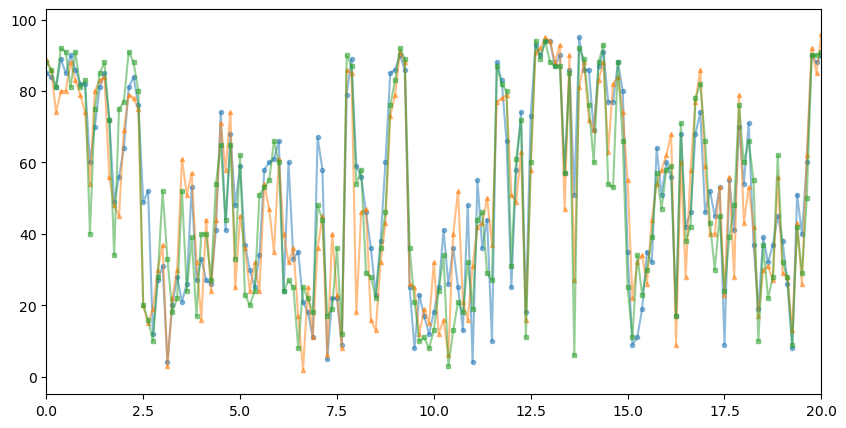

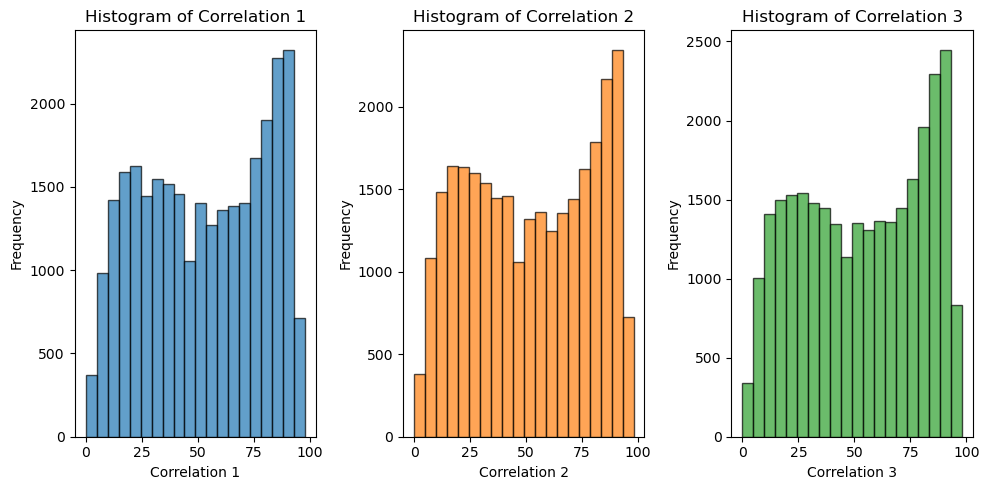

In [ ]:
instrFile = r"O:\HybridDune experiment\data ADV, OBS\raw NetCDF\ADV S1ADV1 raw data - period 1.nc"
ds = xr.open_dataset(instrFile).load()

instrFile2 = r"O:\HybridDune experiment\data ADV, OBS\QC\ADV S1ADV1 QC - period 1.nc"
ds2 = xr.open_dataset(instrFile2).load()

# # crop t: only highest hour
# t = ds.t
# p = ds.p
# t_max = t[p.mean(dim='N').argmax().values].values
ds  = ds.sel(t=slice(t_max, t_max))
ds2 = ds2.sel(t=slice(t_max, t_max))
ds = ds.squeeze() # remove singleton dimensions

t = ds.t # redefine t, for cropped dataset
N = ds.N
p = ds.p 

t2 = ds2.t
eta = ds2.eta
zi_p = ds2.zi_p
print(t_max)

# plot t vs mean p
plt.figure(figsize=(10, 5))
# plt.plot(N, eta - zi_p[1]) # head above pressure sensor [m]
# plt.plot(N,ds.u)  # u velocity
# plt.plot(N, ds.v)  # v velocity
# plt.plot(N,ds.w)
# plt.plot(N,ds.snr1,'*-', markersize=3) # SNR, fairly constant (45-57)
# plt.plot(N,ds.a1,'*-', markersize=3)   # amplitude, fairly constant (140-170)
plt.plot(N,ds.cor1,'o-', markersize=3, alpha=0.5)
plt.plot(N,ds.cor2,'^-', markersize=3, alpha=0.5)
plt.plot(N,ds.cor3,'s-', markersize=3, alpha=0.5)

plt.xlim([0, 20])


# make a new plot, with a histogam of cor1, cor2 and cor3
plt.figure(figsize=(10, 5))
bins = 20

plt.subplot(1, 3, 1)
plt.hist(ds.cor1, bins=bins, color='C0', alpha=0.7, edgecolor='black')
plt.xlabel('Correlation 1')
plt.ylabel('Frequency')
plt.title('Histogram of Correlation 1')

plt.subplot(1, 3, 2)
plt.hist(ds.cor2, bins=bins, color='C1', alpha=0.7, edgecolor='black')
plt.xlabel('Correlation 2')
plt.ylabel('Frequency')
plt.title('Histogram of Correlation 2')

plt.subplot(1, 3, 3)
plt.hist(ds.cor3, bins=bins, color='C2', alpha=0.7, edgecolor='black')
plt.xlabel('Correlation 3')
plt.ylabel('Frequency')
plt.title('Histogram of Correlation 3')

plt.tight_layout()
plt.show()


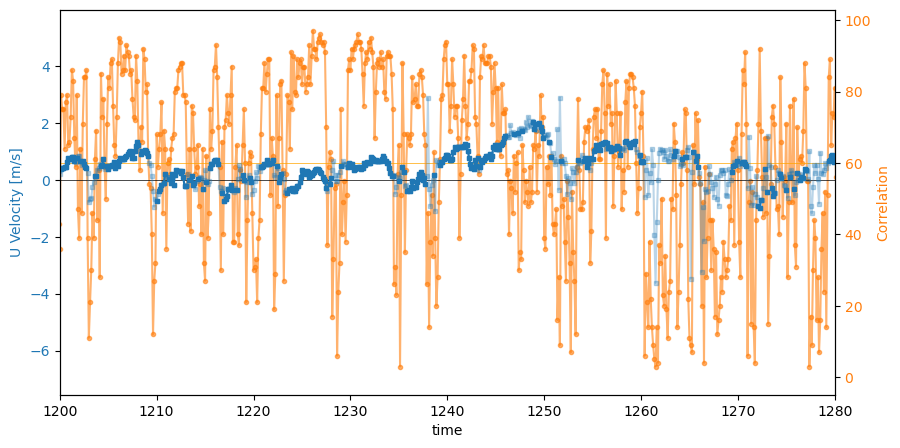

In [128]:
cor_lim = 60
u_filtered = ds.u.where(ds.cor1 > cor_lim)

plt.figure(figsize=(10, 5))
ax1 = plt.gca()
ax1.set_zorder(3)  # Higher zorder means in front
ax1.patch.set_visible(False)  # Make ax1 transparent so ax2 is visible behind
color = 'tab:blue'
ax1.set_xlabel('time')
ax1.set_ylabel('U Velocity [m/s]', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.axhline(0, color='black', linewidth=0.5) # black line at y=0

ax1.plot(N, ds.u, 's-', markersize=3, color=color, label='U Velocity', alpha=0.3)
ax1.plot(N, u_filtered, 's-', markersize=3, color=color, label='U Velocity')



ax2 = ax1.twinx()
ax2.set_zorder(1)  # lower zorder means behind
color = 'tab:orange'
ax2.set_ylabel('Correlation', color=color)
# Plot correlation with lower zorder so it's behind the blue lines
ax2.plot(N, ds.cor1, 'o-', markersize=3, alpha=0.6, color=color, label='Correlation 1')
# ax2.plot(N, ds.cor2, '^-', markersize=3, alpha=0.5, color='tab:green', label='Correlation 2')
# ax2.plot(N, ds.cor3, 's-', markersize=3, alpha=0.5, color='tab:red', label='Correlation 3')
ax2.axhline(cor_lim, color='orange', linestyle='-', linewidth=0.5)  # add horizontal line at y=70
ax2.tick_params(axis='y', labelcolor=color)
dx=1200
xlim = [0+dx, 80+dx]
ax1.set_xlim(xlim)

plt.show()

In [90]:
# # define p_old and p_new, with the percentage of nans per burst in data
# maskp = 100 * ds2.maskp.sum(dim='N').values / 28720 # dp < 4sigma
# maskd = 100 * ds2.maskd.sum(dim='N').values / 28720 # zs < zi_p
# maskv = 100 * ds2.maskv.sum(dim='N').values / 28720 # u<umax, du<4sigma, corr>70%
# p_old = 100 - 100 * np.isnan(ds2.u).sum(dim='N').values / 28720

# mc = 100 * ds2.mc.sum(dim='N').values / 28720 # correlation
# mu = 100 * ds2.mu.sum(dim='N').values / 28720 # abs(u)<u_lim
# md = 100 * ds2.md.sum(dim='N').values / 28720 # du < 4sigma

print(mc)
# print(mu)
# print(md)

# print(maskp)
# print(maskd)
# print(maskv)

[28.19986072]
